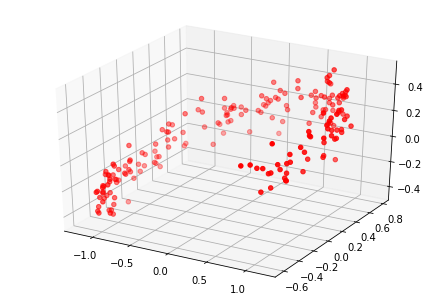

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')
plt.show()

In [2]:
idx = np.arange(m)
np.random.shuffle(idx)
x_train = data[idx[:int(m/2)]]
x_test = data[idx[int(m/2):]]

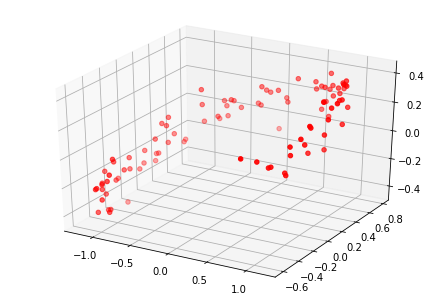

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c='r', marker='o')
plt.show()

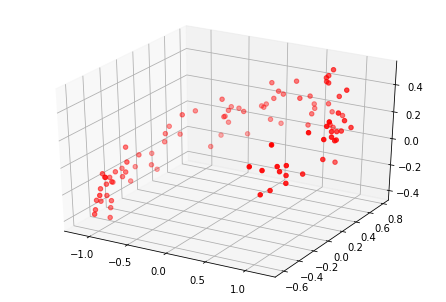

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c='r', marker='o')
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 100 samples
Epoch 1/20
100/100 [==============================] - 0s 1ms/sample - loss: 1.1830
Epoch 2/20
100/100 [==============================] - 0s 77us/sample - loss: 1.0401
Epoch 3/20
100/100 [==============================] - 0s 78us/sample - loss: 0.9190
Epoch 4/20
100/100 [==============================] - 0s 121us/sample - loss: 0.8129
Epoch 5/20
100/100 [==============================] - 0s 89us/sample - loss: 0.7353
Epoch 6/20
100/100 [==============================] - 0s 104us/sample - loss: 0.6692
Epoch 7/20
100/100 [==============================] - 0s 144us/sample - loss: 0.6079
Epoch 8/20
100/100 [==============================] - 0s 144us/sample - loss: 0.5659
Epoch 9/20
100/100 [==============================] - 0s 102us/sample - loss: 0.5198
Epoch 10/20
100/100 [==============================] - 0s 135us/sample - loss: 0.4783
Epoch 11/20
100/100 [==============================]

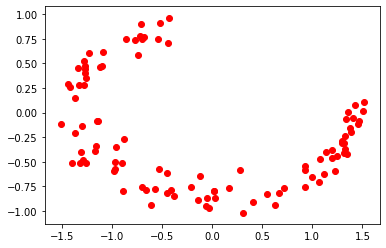

In [5]:
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()    

dense = tf.keras.layers.Dense
seq = tf.keras.models.Sequential
encoder = seq([dense(2, input_shape=[3])])
decoder = seq([dense(3, input_shape=[2])])
autoencoder = seq([encoder, decoder])

sgd = tf.keras.optimizers.SGD
autoencoder.compile(loss="mse", optimizer=sgd(lr=0.01))

autoencoder.fit(x_train, x_train, epochs=20)
hidden_test = encoder.predict(x_test) 

fig, ax = plt.subplots()
ax.scatter(hidden_test[:, 0], hidden_test[:, 1], c='r', marker='o')
plt.show()